In [2]:
import random

DATA_WIDTH=28
DATA_HEIGHT=28
NUMBER_OF_TRAINING_EXAMPLES=5000
NUMBER_OF_VALIDATION_EXAMPLES=1000

ALL_TRAINING_IMAGES=[]
ALL_TRAINING_LABELS=[]
ALL_VALIDATION_IMAGES=[]
ALL_VALIDATION_LABELS=[]

'''
Convert ASC-II pixel into numerical data and vice versa
    - ' ' is converted to 0, which means it's part of the background
    - '#' is converted to 2, part of the image interior
    - '+' is converted to 1, part of the edges
    
'''

def _pixel_to_value(character):
    if(character == ' '):
        return 0.
    elif(character == '#'):
        return 2
    elif(character == '+'):
        return 1 
    
def _value_to_pixel(value):
    if(value == 0):
        return ' '
    elif(value == 2):
        return '#'
    elif(value == 1):
        return '+'
'''
Function for loading data and label files
'''

def _load_data_file(filename, n, width, height):
    fin = [l[:-1] for l in open(filename).readlines()]
    fin.reverse()
    items = []
    for i in range(n):
        data = []
        for j in range(height):
            row = list(map(_pixel_to_value, list(fin.pop())))
            data.append(row)
        items.append(data)
    return items
        
def _load_label_file(filename, n):
    fin = [l[:-1] for l in open(filename).readlines()]
    labels = []
    for i in range(n):
        labels.append(int(fin[i]))
    return labels

def _load_all_data():
    global ALL_TRAINING_IMAGES
    global ALL_TRAINING_LABELS
    global ALL_VALIDATION_IMAGES
    global ALL_VALIDATION_LABELS

    ALL_TRAINING_IMAGES = _load_data_file("Q3 files//trainingimages",
        NUMBER_OF_TRAINING_EXAMPLES, DATA_WIDTH, DATA_HEIGHT)
    ALL_TRAINING_LABELS = _load_label_file("Q3 files//traininglabels",
        NUMBER_OF_TRAINING_EXAMPLES)

    ALL_VALIDATION_IMAGES = _load_data_file("Q3 files//validationimages",
        NUMBER_OF_VALIDATION_EXAMPLES, DATA_WIDTH, DATA_HEIGHT)
    ALL_VALIDATION_LABELS = _load_label_file("Q3 files//validationlabels",
        NUMBER_OF_VALIDATION_EXAMPLES)

'''
Function for printing digits
'''

def _print_digit_image(data):
    for row in range(len(data)):
        print(''.join(map(_value_to_pixel, data[row])))
    
_load_all_data()

example_number = random.randint(0, NUMBER_OF_TRAINING_EXAMPLES)
# print("Printing digit example #" + str(example_number + 1) + " with label: " \
#         + str(ALL_TRAINING_LABELS[example_number]))
# _print_digit_image(ALL_TRAINING_IMAGES[example_number])


In [3]:
'''
Extract 'basic' features, i.e., whether a pixel is in the background or part of the digit
'''

'''
Extract advanced features that you will come up with. For example: 
**Note that it's not mandatory to use the features listed above.
'''

    # Calculate the width and height of the digit
    # Calculate the number of #s and +s in the top half ( or in any other part)
    # Define a rowlimit and investigate if the amount of #s/+s surpasses the limit
    


"\nExtract advanced features that you will come up with. For example: \n**Note that it's not mandatory to use the features listed above.\n"

# With feature extraction

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

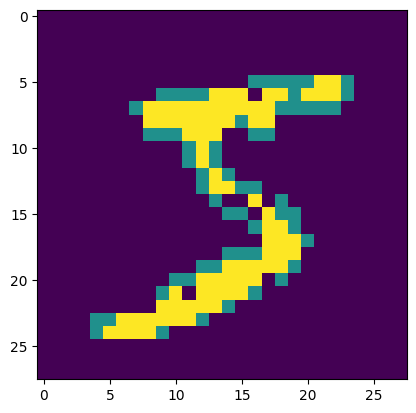

In [5]:
plt.imshow(ALL_TRAINING_IMAGES[0])

In [6]:
n_fea = 8
features = []
for j in range(NUMBER_OF_TRAINING_EXAMPLES):
    feature = [0]*8
    for i in range(DATA_HEIGHT//2):
        number_row_i = ALL_TRAINING_IMAGES[j][i]
        feature[0] += number_row_i[:DATA_HEIGHT//2].count(1)
        feature[1] += number_row_i[:DATA_HEIGHT//2].count(2)
        feature[2] += number_row_i[DATA_HEIGHT//2:].count(1)
        feature[3] += number_row_i[DATA_HEIGHT//2:].count(2)
    for i in range(DATA_HEIGHT//2,DATA_HEIGHT):
        number_row_i = ALL_TRAINING_IMAGES[j][i]
        feature[4] += number_row_i[:DATA_HEIGHT//2].count(1)
        feature[5] += number_row_i[:DATA_HEIGHT//2].count(2)
        feature[6] += number_row_i[DATA_HEIGHT//2:].count(1)
        feature[7] += number_row_i[DATA_HEIGHT//2:].count(2)
    features.append(feature)
         

Priors = [ALL_TRAINING_LABELS.count(i)/NUMBER_OF_TRAINING_EXAMPLES for i in range(10)]

In [7]:
y =lambda x: 0 if x<5 else 1 if x<16 else 2 if x < 25 else 3

In [8]:
for i in range(NUMBER_OF_TRAINING_EXAMPLES):
    features[i] = np.array([y(x) for x in features[i]])

In [9]:
def give_count_c():
    sum_features_for_each_class = [0]*10
    for i in range(NUMBER_OF_TRAINING_EXAMPLES):
        sum_features_for_each_class[ALL_TRAINING_LABELS[i]] += sum(features[i])
    return sum_features_for_each_class
sum_features_for_each_class = give_count_c()

In [10]:
conditionals = [[0 for p in range(n_fea)] for i in range(10)]
for i in range(NUMBER_OF_TRAINING_EXAMPLES):
    for j in range(n_fea):
        conditionals[ALL_TRAINING_LABELS[i]][j] += features[i][j]
for i in range(10):
    for j in range(n_fea):
        conditionals[i][j] =  (conditionals[i][j]+1)/(sum_features_for_each_class[i] +n_fea)

In [11]:
from math import log10 as log
import numpy as np

In [12]:
val_features = []
for j in range(NUMBER_OF_VALIDATION_EXAMPLES):
    val_feature = [0]*8
    for i in range(DATA_HEIGHT//2):
        number_row_i = list(ALL_VALIDATION_IMAGES[j][i])
        val_feature[0] += number_row_i[:DATA_HEIGHT//2].count(1)
        val_feature[1] += number_row_i[:DATA_HEIGHT//2].count(2)
        val_feature[2] += number_row_i[DATA_HEIGHT//2:].count(1)
        val_feature[3] += number_row_i[DATA_HEIGHT//2:].count(2)
    for i in range(DATA_HEIGHT//2,DATA_HEIGHT):
        number_row_i = list(ALL_VALIDATION_IMAGES[j][i])
        val_feature[4] += number_row_i[:DATA_HEIGHT//2].count(1)
        val_feature[5] += number_row_i[:DATA_HEIGHT//2].count(2)
        val_feature[6] += number_row_i[DATA_HEIGHT//2:].count(1)
        val_feature[7] += number_row_i[DATA_HEIGHT//2:].count(2)
    val_features.append(val_feature)
         


In [13]:
for i in range(NUMBER_OF_VALIDATION_EXAMPLES):
    val_features[i] = np.array([y(x) for x in val_features[i]])

In [14]:
prob = np.ones((NUMBER_OF_VALIDATION_EXAMPLES,10))
for j in range(NUMBER_OF_VALIDATION_EXAMPLES):
    for i in range(10):
        prob[j][i] = log(Priors[i])
        for k in range(n_fea):
            prob[j][i] += val_features[j][k]*log(conditionals[i][k]) 

preds = prob.argmax(axis = 1)

In [15]:
acc = 0
for i in range(NUMBER_OF_VALIDATION_EXAMPLES):
    if ALL_VALIDATION_LABELS[i] == preds[i]:
        acc += 1
acc = acc/len(ALL_VALIDATION_LABELS)*100
print(f"accuracy is {acc}%")

accuracy is 30.099999999999998%


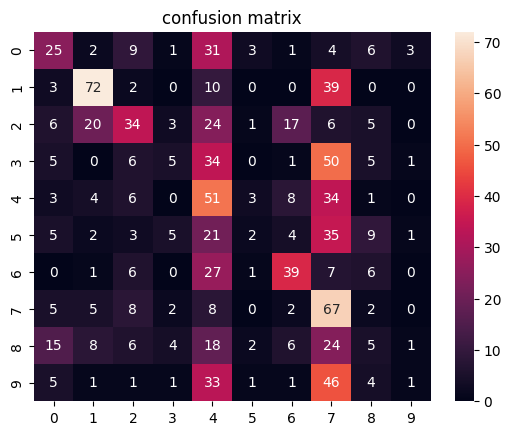

In [16]:
sns.heatmap(confusion_matrix( np.array(ALL_VALIDATION_LABELS),preds), annot=True)
plt.title("confusion matrix");

# Without feature extraction

In [17]:
ALL_TRAINING_IMAGES = np.array(ALL_TRAINING_IMAGES)
ALL_VALIDATION_IMAGES = np.array(ALL_VALIDATION_IMAGES)

In [18]:
ALL_TRAINING_IMAGES = ALL_TRAINING_IMAGES.reshape(5000,28*28)
ALL_VALIDATION_IMAGES = ALL_VALIDATION_IMAGES.reshape(1000,28*28)

In [19]:
n_fea = 28*28
features = ALL_TRAINING_IMAGES
val_features = ALL_VALIDATION_IMAGES
Priors = [ALL_TRAINING_LABELS.count(i)/NUMBER_OF_TRAINING_EXAMPLES for i in range(10)]

In [20]:
conditionals = [[0 for p in range(n_fea)] for i in range(10)]
for i in range(NUMBER_OF_TRAINING_EXAMPLES):
    for j in range(n_fea):
        conditionals[ALL_TRAINING_LABELS[i]][j] += features[i][j]
for i in range(10):
    for j in range(n_fea):
        conditionals[i][j] =  (conditionals[i][j]+1)/( +n_fea)

In [21]:
prob = np.ones((NUMBER_OF_VALIDATION_EXAMPLES,10))
for j in range(NUMBER_OF_VALIDATION_EXAMPLES):
    for i in range(10):
        prob[j][i] = log(Priors[i])
        for k in range(n_fea):
            prob[j][i] += val_features[j][k]*log(conditionals[i][k]) 

preds = prob.argmax(axis = 1)

In [22]:
acc = 0
for i in range(NUMBER_OF_VALIDATION_EXAMPLES):
    if ALL_VALIDATION_LABELS[i] == preds[i]:
        acc += 1
acc = acc/len(ALL_VALIDATION_LABELS)*100
print(f"accuracy is {acc}%")

accuracy is 72.5%


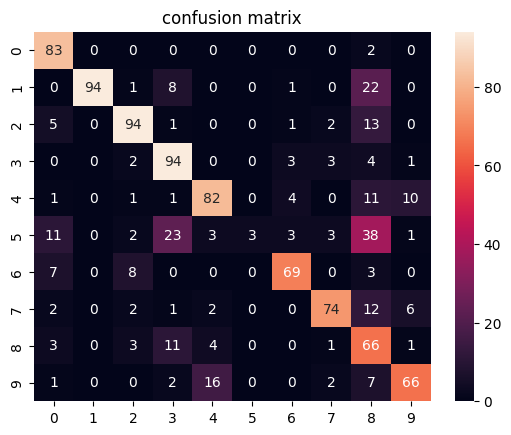

In [23]:
sns.heatmap(confusion_matrix( np.array(ALL_VALIDATION_LABELS),preds), annot=True)
plt.title("confusion matrix");